In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the data from JSON files
def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [ ]:
# Preprocess text
def preprocess(text):
    lower = text.lower()
    no_punctuation = lower.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(no_punctuation)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed)

In [ ]:
# Load and preprocess data
github_data = load_json_data('/content/drive/MyDrive/Model/github_data.json')
openai_api_data = load_json_data('/content/drive/MyDrive/Model/openai_api_data.json')

github_prompts_answers = {entry['Prompt']: entry['Answer'] for entry in github_data}
openai_api_prompts_answers = {entry['Prompt']: entry['Answer'] for entry in openai_api_data}

common_prompts = set(github_prompts_answers.keys()).intersection(set(openai_api_prompts_answers.keys()))

In [ ]:
# Preparing data for TF-IDF
documents = []
for prompt in common_prompts:
    documents.append(github_prompts_answers[prompt])
    documents.append(openai_api_prompts_answers[prompt])

In [ ]:
# Vectorize text
vectorizer = TfidfVectorizer(preprocessor=preprocess)
tfidf_matrix = vectorizer.fit_transform(documents)

In [ ]:
# Convert common_prompts to a list for indexing
common_prompts_list = list(common_prompts)

# Calculate cosine similarity and store results
similarity_scores = []
for i in range(0, len(tfidf_matrix.toarray()), 2):
    score = cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[i+1:i+2])[0][0]
    similarity_scores.append((common_prompts_list[i//2], score))

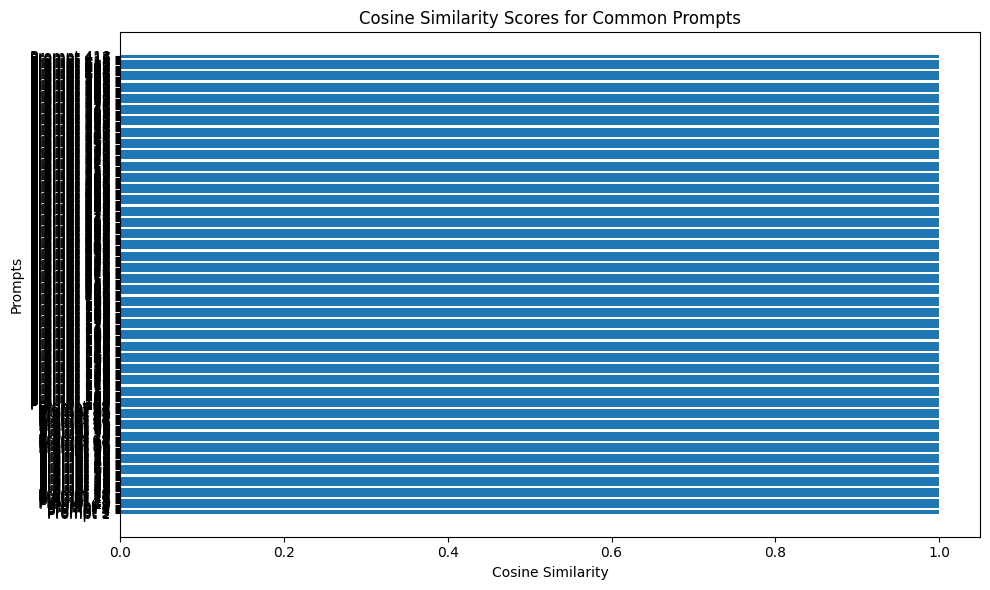

Prompt Mapping:
Prompt 1: As an AI with extensive knowledge and excellent pedagogical skills, your task is to transform the given concept or topic into a comprehensive lesson. Start by providing an engaging introduction that hooks the learner's interest. Define clear learning objectives that outline what the learner will gain from the lesson. Then, break down the topic into manageable sections or steps, explaining each one in an understandable manner. Incorporate practical examples, activities, or exercises where possible to reinforce learning. Finally, provide a summary and potential follow-up activities or resources for further study. You ensure that your lesson is structured, detailed, and catered to the learner's level of understanding.

---
Please wait for my next message before you respond.
Prompt 2: Explain we the concept of known unknowns and unknown unknowns in tackling tasks and projects with uncertainty and risks:
Prompt 3: What is EDI 820?
Prompt 4: What is EDI 810?
Prompt 

In [ ]:
# Simplify prompts by numbering them
simplified_prompts = [f'Prompt {i+1}' for i in range(len(prompts))]

# Create a mapping table for reference
prompt_mapping = dict(zip(simplified_prompts, prompts))

# Visualization with simplified prompts
plt.figure(figsize=(10, 6))
plt.barh(simplified_prompts, scores)
plt.xlabel('Cosine Similarity')
plt.ylabel('Prompts')
plt.title('Cosine Similarity Scores for Common Prompts')
plt.tight_layout()
plt.show()

# Display the mapping table (can be exported or viewed separately)
print("Prompt Mapping:")
for key, value in prompt_mapping.items():
    print(f"{key}: {value}")


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming similarity_scores is a list of tuples like [(prompt1, score1), (prompt2, score2), ...]
prompts, scores = zip(*similarity_scores)

# Create a DataFrame for the heatmap
df = pd.DataFrame(np.diag(scores), index=prompts, columns=prompts)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df, annot=True, cmap="coolwarm")
plt.title("Cosine Similarity Heatmap")
plt.show()


In [ ]:
# 2. Scatter Plot with Annotations
import plotly.express as px

# Create DataFrame for Plotly
df = pd.DataFrame({'Prompts': prompts, 'Similarity Scores': scores})

# Create a scatter plot
fig = px.scatter(df, x='Similarity Scores', y='Prompts', text='Prompts')
fig.update_traces(textposition='top center')
fig.update_layout(title='Cosine Similarity Scores Scatter Plot')
fig.show()


In [ ]:
# Word Cloud

from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate_from_frequencies(dict(similarity_scores))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


ValueError: ignored